## Importing Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

In [3]:
# Inspects the first 5 observations of our dataset
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Gets a summary of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Fixing the datetime column

In [6]:
train["date"] = pd.to_datetime(train['datetime']).dt.date
train["time"] = pd.to_datetime(train["datetime"]).dt.time
train["day"] = pd.to_datetime(train["datetime"]).dt.day_name()
train['day'] = pd.Categorical(train['day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
train["month"] = pd.to_datetime(train["datetime"]).dt.month
train["year"] = pd.to_datetime(train["datetime"]).dt.year
train = train.drop(['datetime'], axis = 1)

In [7]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,6.521495,2011.501929
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,3.444373,0.500019
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2011.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,4.000000,2011.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,7.000000,2012.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,10.000000,2012.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,12.000000,2012.000000


### Analysing Missing Values

In [8]:
train.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
time          0
day           0
month         0
year          0
dtype: int64

In [9]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,Saturday,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,Saturday,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00,Saturday,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00,Saturday,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00,Saturday,1,2011


## Exploratory Data Analysis

In [10]:
train.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,Saturday,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,Saturday,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00,Saturday,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00,Saturday,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00,Saturday,1,2011


<AxesSubplot:xlabel='date', ylabel='count'>

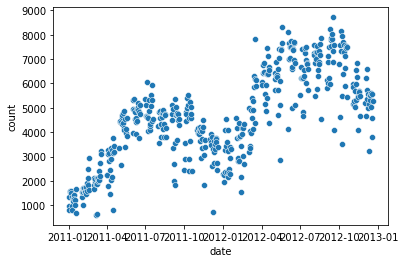

In [11]:
date_count = train.groupby(['date']).sum()
sns.scatterplot(x= 'date', y = 'count', data = date_count)

TypeError: float() argument must be a string or a real number, not 'datetime.time'

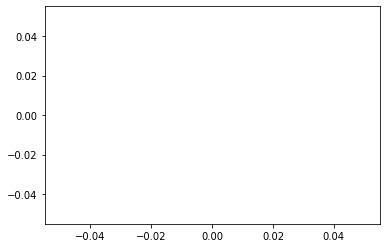

In [12]:
time_count = train.groupby(['time']).sum()
sns.scatterplot(x = 'time', y = 'count', data = time_count)

date_count

In [ ]:
date_count

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
date,,,,,,,,,,,,
2011-01-01,24,0,0,38,338.66,436.350,1934,257.9969,331,654,985,24
2011-01-02,23,0,0,45,342.76,406.800,1601,382.9988,131,670,801,23
2011-01-03,22,0,22,22,177.12,208.345,962,366.0076,120,1229,1349,22
2011-01-04,23,0,23,24,188.60,243.940,1358,247.0156,108,1454,1562,23
2011-01-05,23,0,23,23,214.02,263.660,1005,288.0129,82,1518,1600,23
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,96,0,0,33,318.98,406.060,1561,171.0108,767,4280,5047,288
2012-12-16,96,0,0,49,356.70,443.925,2013,161.9926,538,3248,3786,288
2012-12-17,96,0,24,51,387.04,481.800,2177,157.9994,212,4373,4585,288


<AxesSubplot:xlabel='month', ylabel='temp'>

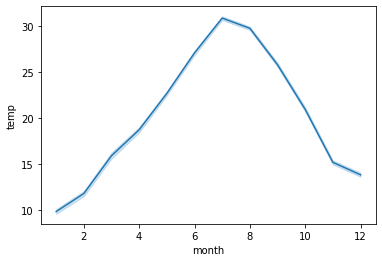

In [ ]:
sns.lineplot(data = train, x = "month", y = "temp")

In [ ]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00:00:00,Saturday,1,2011
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01:00:00,Saturday,1,2011
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02:00:00,Saturday,1,2011
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03:00:00,Saturday,1,2011
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04:00:00,Saturday,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19:00:00,Wednesday,12,2012
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,20:00:00,Wednesday,12,2012
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21:00:00,Wednesday,12,2012
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22:00:00,Wednesday,12,2012


### Our datetime variables

#### Analysis of datetime variables with count

In [ ]:
current_palette = sns.color_palette("hls", 8)

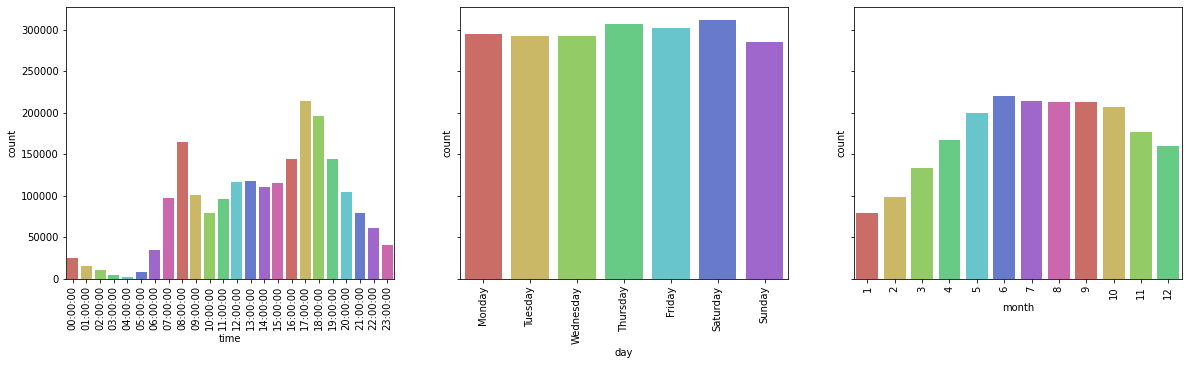

In [ ]:
dataframe_dict = {}
variables = ['time', 'day', 'month']
for element in variables: 
    dataframe_dict[element] = train.groupby(element).sum().reset_index()
fig, axes = plt.subplots(1, 3, figsize = (20, 5), sharey = True)
i = 0
for element in variables:
    sns.barplot(x = dataframe_dict[element][element], y = dataframe_dict[element]['count'], palette = current_palette, ax = axes[i]).tick_params(axis='x', rotation=90)
    i += 1
plt.show()

#### Analysing Time

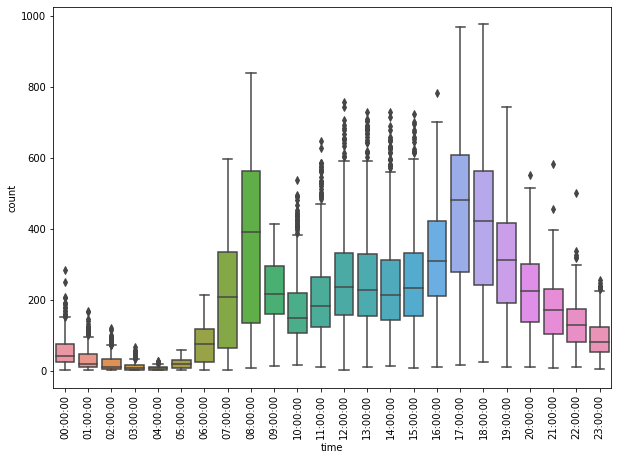

In [ ]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = train['time'], y = train['count']).tick_params(axis='x', rotation=90)
plt.show()

#### Analysing Day of the Week

We can also verify this via boxplots: 

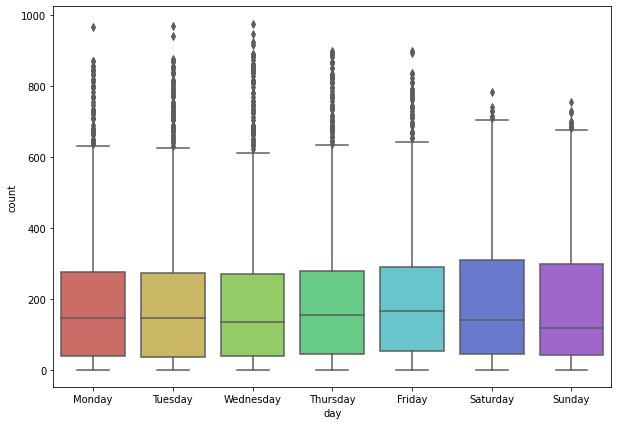

In [ ]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = train['day'], y = train['count'], palette = current_palette)
plt.show()

We can see that our the counts of bike users is constant by the day of the week. However there seems to be more outliers on weekdays than weekends. We use Monday for example.  

In [ ]:
monday = train[train['day'] == 'Monday']
q3 = np.quantile(monday['count'], 0.75)
q1 = np.quantile(monday['count'], 0.25)
upper_range = q3 + 1.5 * (q3 - q1)
new_frame = monday[monday['count'] >= upper_range][['count', 'date', 'time', 'month', 'year']]
new_frame['time'].value_counts()
new_frame['year'].value_counts()

2012    49
Name: year, dtype: int64

It seems most of the outliers on Monday is in 2012 and during peak times when people go to and from work. This can be extended to the other weekdays. 

### Month

c

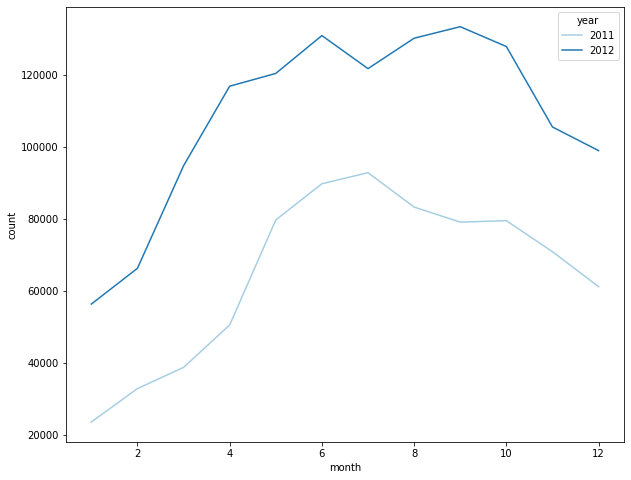

In [ ]:
plt.figure(figsize = (10, 8))
current = sns.color_palette('Paired', 9)
sns.lineplot(data = month_year_group, x = "month", y = "count", hue = "year", palette = current[:2])
plt.show()

### Weather Conditions

Categorical Variable: `Weather`

Firstly

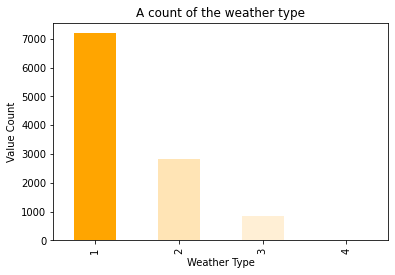

In [ ]:
cm = plt.get_cmap('plasma')
train["weather"].value_counts().plot(kind = 'bar', xlabel = "Weather Type", ylabel = "Value Count", title = "A count of the weather type", color = ['orange', 'moccasin', 'papayawhip'])
plt.show()

We notice that we can't see any values when weather type is equal to $4$. Let's have a look at the observations when `weather` = 4. 

In [ ]:
train[train['weather'] == 4]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year
5631,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012-01-09,18:00:00,0,1,2012


We can see that there is only 1 observation. 

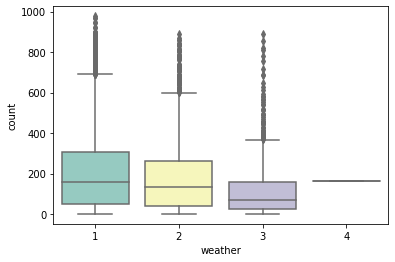

In [ ]:
current = sns.color_palette('Set3', 10)
sns.boxplot(data = train, x = "weather", y = "count", palette = current)
plt.show()

We know when the weather type increases, it means the weather situation gets bad. Therefore we can see that as the weather conditions worsens, it means that less people are riding bikes. Furthermore we can see that the count for weather type $4$ is on average greater than weather type $3$. 

In [ ]:
train[train["date"] == pd.Timestamp(2012, 1, 9)]

c:\Users\Gordon Li\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year
5613,1,0,1,1,9.84,11.365,60,15.0013,3,12,15,2012-01-09,00:00:00,0,1,2012
5614,1,0,1,1,9.84,12.120,60,8.9981,1,4,5,2012-01-09,01:00:00,0,1,2012
5615,1,0,1,1,9.84,12.120,56,8.9981,2,3,5,2012-01-09,02:00:00,0,1,2012
5616,1,0,1,1,9.84,12.120,52,11.0014,0,3,3,2012-01-09,03:00:00,0,1,2012
5617,1,0,1,1,9.02,12.120,64,7.0015,0,4,4,2012-01-09,04:00:00,0,1,2012
5618,1,0,1,2,8.20,11.365,64,6.0032,0,21,21,2012-01-09,05:00:00,0,1,2012
5619,1,0,1,2,9.02,11.365,60,8.9981,3,85,88,2012-01-09,06:00:00,0,1,2012
5620,1,0,1,2,9.02,12.120,60,7.0015,1,239,240,2012-01-09,07:00:00,0,1,2012
5621,1,0,1,2,9.02,12.880,55,6.0032,13,407,420,2012-01-09,08:00:00,0,1,2012
5622,1,0,1,2,9.02,13.635,64,0.0000,9,188,197,2012-01-09,09:00:00,0,1,2012


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  date        10886 non-null  object 
 12  time        10886 non-null  object 
 13  day         10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  year        10886 non-null  int64  
dtypes: float64(3), int64(11), object(2)
memory usage: 1.3+ MB


In [23]:
variables = ['temp', 'atemp', 'humidity', 'windspeed']
sns.boxplot(x = variables)

TypeError: Horizontal orientation requires numeric `x` variable.

In [24]:
variables = ['temp', 'atemp', 'humidity', 'windspeed']
colours = ['gold', 'lightcyan', 'skyblue', 'plum']

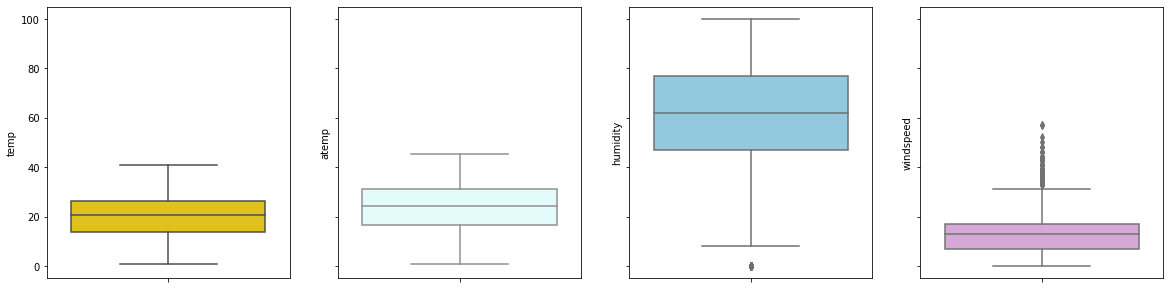

In [28]:
fig, axes = plt.subplots(1, 4, figsize = (20, 5), sharey = True)
i = 0 
for tuple in zip(variables, colours): 
    sns.boxplot(y = train[tuple[0]], ax = axes[i], color = tuple[1])
    i += 1
plt.show()

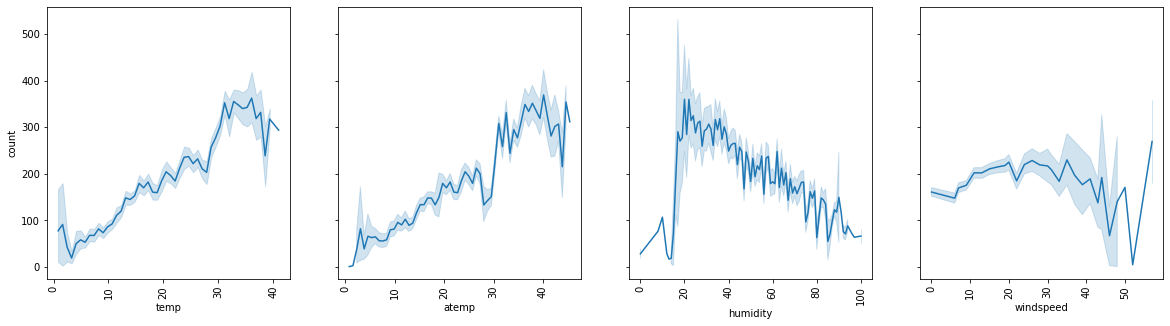

In [20]:
variables = ['temp', 'atemp', 'humidity', 'windspeed']
fig, axes = plt.subplots(1, 4, figsize = (20, 5), sharey = True)
i = 0
for element in variables:
    sns.lineplot(x = train[element], y = train['count'], ax = axes[i]).tick_params(axis='x', rotation=90)
    i += 1
plt.show()

### Categorical Variables

In [41]:
variables = ['season', 'holiday', 'workingday']

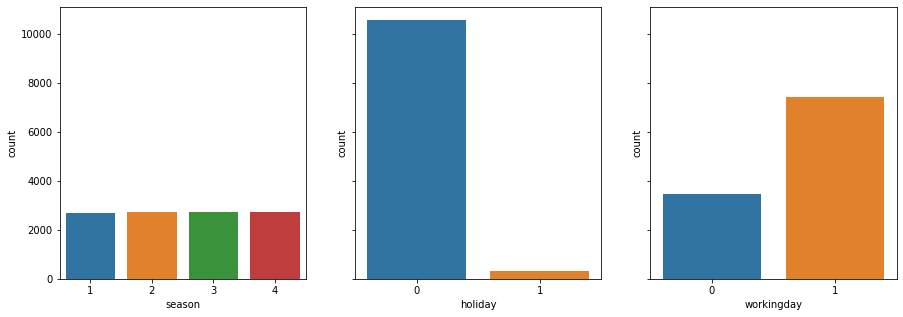

In [47]:
variables = ['season', 'holiday', 'workingday']
fig, axes = plt.subplots(1, 3, figsize = (15, 5), sharey = True)
i = 0
for element in variables:
    sns.countplot(data = train, x = element, ax = axes[i])
    i += 1